In [1]:
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

# Charger les données depuis le fichier CSV
data = pd.read_csv('C:/Users/hp/Desktop/prj_pfe_inwi/voice_overall.csv')


In [2]:
# Filtrer les colonnes catégorielles de type 'object'
colonnes_categorielles = data.select_dtypes(include=['object'])

# Afficher les colonnes catégorielles
print(colonnes_categorielles.columns)

Index(['mdn', 'idnt_client_crm', 'idnt_compte_facturation', 'desc_profil',
       'princp_data_vol_jour_secteur', 'princp_data_vol_jour_ville',
       'princp_data_vol_soir_secteur', 'princp_data_vol_soir_ville',
       'princp_data_vol_nuit_secteur', 'princp_data_vol_nuit_ville',
       'princp_data_vol_total_secteur', 'princp_data_vol_total_ville',
       'princp_voix_dur_jour_secteur', 'princp_voix_dur_jour_ville',
       'princp_voix_dur_soir_secteur', 'princp_voix_dur_soir_ville',
       'princp_voix_dur_nuit_secteur', 'princp_voix_dur_nuit_ville',
       'princp_voix_dur_total_secteur', 'princp_voix_dur_total_ville',
       'princp_actv_total_secteur', 'princp_actv_ville'],
      dtype='object')


In [3]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

for colonne in colonnes_categorielles.columns:
    # Encoder la variable catégorielle
    encoded_variable = label_encoder.fit_transform(data[colonne])
    # Assigner les valeurs encodées à la colonne correspondante dans la dataframe
    data[colonne] = encoded_variable
    

In [4]:
columns=['desc_profil',
       'princp_data_vol_jour_secteur', 'princp_data_vol_jour_ville',
       'princp_data_vol_soir_secteur', 'princp_data_vol_soir_ville',
       'princp_data_vol_nuit_secteur', 'princp_data_vol_nuit_ville',
       'princp_data_vol_total_octets', 'princp_data_vol_total_secteur',
       'princp_data_vol_total_ville', 'princp_voix_dur_jour_secteur',
       'princp_voix_dur_jour_ville', 'princp_voix_dur_soir_secteur',
       'princp_voix_dur_soir_ville', 'princp_voix_dur_nuit_secteur',
       'princp_voix_dur_nuit_ville', 'princp_voix_dur_total_secteur',
       'princp_voix_dur_total_ville', 'princp_actv_total_secteur',
       'princp_actv_ville', 'princp_vol_actv']

In [5]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[columns])

In [7]:
import numpy as np
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from itertools import product

In [8]:
# Paramètres à tester pour DBSCAN
min_samples_values = [3,4,5,6, 7]  # Vous pouvez ajuster ces valeurs en fonction de votre taille de données
eps_values = [0.5, 1.0, 1.5]    # Vous pouvez ajuster ces valeurs en fonction de votre échelle de données


In [10]:
from sklearn.cluster import DBSCAN
import numpy as np
# Variables pour stocker les meilleures valeurs
best_eps = None
best_min_samples = None
best_score = -1
best_num_clusters = 0

# Recherche des valeurs optimales
for eps, min_samples in product(eps_values, min_samples_values):
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    clusters = dbscan.fit_predict(data_scaled)
    
    # Ignorer les résultats où tous les points sont considérés comme du bruit (-1)
    if len(np.unique(clusters)) > 2:
        num_clusters = len(np.unique(clusters)) - 1  # Soustraire 1 pour ne pas compter le bruit comme un cluster
        if 3 <= num_clusters <= 10:
            silhouette_avg = silhouette_score(data_scaled, clusters)
            if silhouette_avg > best_score:
                best_eps = eps
                best_min_samples = min_samples
                best_score = silhouette_avg
                best_num_clusters = num_clusters

# Affichage des valeurs optimales
print("Valeurs optimales :")
print("eps =", best_eps)
print("min_samples =", best_min_samples)
print("best_num_clusters =", best_num_clusters)


Valeurs optimales :
eps = None
min_samples = None
best_num_clusters = 0


In [6]:
from sklearn.cluster import DBSCAN
import numpy as np
# Variables pour stocker les meilleures valeurs
best_eps = None
best_min_samples = None
best_num_clusters = 0

# Recherche des valeurs optimales
for eps in np.arange(0.1, 1.0, 0.1):
    for min_samples in range(2,9):
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        clusters = dbscan.fit_predict(data)
        num_clusters = len(set(clusters)) - (1 if -1 in clusters else 0)
        if num_clusters > best_num_clusters:
            best_num_clusters = num_clusters
            best_eps = eps
            best_min_samples = min_samples

# Affichage des valeurs optimales
print("Valeurs optimales :")
print("eps =", best_eps)
print("min_samples =", best_min_samples)

KeyboardInterrupt: 

In [8]:
# Créer un objet DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=2)  # Réglez les paramètres eps et min_samples selon vos besoins

# Effectuer le clustering
clusters = dbscan.fit_predict(data_scaled)

# Ajouter les résultats du clustering au jeu de données

data['cluster'] = clusters

# Afficher le nombre de clusters créés et les échantillons dans chaque cluster
num_clusters = len(set(clusters)) - (1 if -1 in clusters else 0)
num_outliers = list(clusters).count(-1)
print("Nombre de clusters : ", num_clusters)
print("Nombre d'échantillons aberrants : ", num_outliers)

# Afficher les données avec les clusters
print(data.head())





Nombre de clusters :  2022
Nombre d'échantillons aberrants :  20704
     mdn  idnt_client_crm  idnt_compte_facturation  desc_profil  \
0   1396            32123                    30956           61   
1   4780             1030                    33942           62   
2  13419            13001                    22282           62   
3  31680            14218                    22803           62   
4   4490             3107                     8944           62   

   princp_data_vol_jour_secteur  princp_data_vol_jour_ville  \
0                         11912                          76   
1                             0                           0   
2                           129                          41   
3                          8683                          32   
4                          2716                          32   

   princp_data_vol_soir_secteur  princp_data_vol_soir_ville  \
0                         12156                          62   
1                       

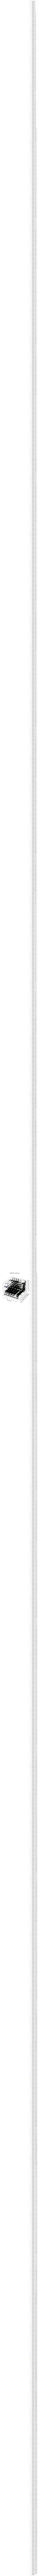

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

# Afficher le scatter plot 3D des résultats du clustering
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Données de clustering
# Assurez-vous d'avoir les données 'data', les étiquettes de cluster 'clusters', et les colonnes 'columns' définies

# Définir les couleurs pour chaque cluster
colors = ['blue', 'red', 'green', 'orange', 'purple', 'yellow', 'cyan', 'magenta', 'lime', 'pink', 'brown', 'teal', 'lavender', 'olive', 'gold', 'salmon', 'lightblue', 'darkgreen', 'violet', 'lightgreen', 'coral', 'skyblue']

# Obtenez la liste des étiquettes de cluster uniques
cluster_labels = set(clusters)

for cluster_label in cluster_labels:
    if cluster_label == -1:
        # Echantillons aberrants (outliers) sont affichés en noir
        cluster_data = data[data['cluster'] == cluster_label][columns]
        ax.scatter(cluster_data[columns[0]], cluster_data[columns[1]], cluster_data[columns[2]], color='black', alpha=0.5, label='Outliers')
    else:
        # Echantillons du cluster sont affichés dans une couleur spécifique
        cluster_data = data[data['cluster'] == cluster_label][columns]
        color_index = list(cluster_labels).index(cluster_label) % len(colors)
        cluster_color = colors[color_index]
        ax.scatter(cluster_data[columns[0]], cluster_data[columns[1]], cluster_data[columns[2]], color=cluster_color, alpha=0.5, label='Cluster {}'.format(cluster_label))

ax.set_xlabel(columns[0])
ax.set_ylabel(columns[1])
ax.set_zlabel(columns[2])
ax.set_title('DBSCAN Clustering')

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

# Afficher le scatter plot 3D des résultats du clustering
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Données de clustering
# Assurez-vous d'avoir les données 'data', les étiquettes de cluster 'clusters', et les colonnes 'columns' définies

# Définir les couleurs pour chaque cluster
colors = ['blue', 'red', 'green', 'orange', 'purple', 'yellow', 'cyan', 'magenta', 'lime', 'pink', 'brown', 'teal', 'lavender', 'olive', 'gold', 'salmon', 'lightblue', 'darkgreen', 'violet', 'lightgreen', 'coral', 'skyblue']

# Obtenez la liste des étiquettes de cluster uniques
cluster_labels = set(clusters)

for cluster_label in cluster_labels:
    if cluster_label == -1:
        # Echantillons aberrants (outliers) sont affichés en noir
        cluster_data = data[data['cluster'] == cluster_label][columns]
        ax.scatter(cluster_data[columns[3]], cluster_data[columns[4]], cluster_data[columns[2]], color='black', alpha=0.5, label='Outliers')
    else:
        # Echantillons du cluster sont affichés dans une couleur spécifique
        cluster_data = data[data['cluster'] == cluster_label][columns]
        color_index = list(cluster_labels).index(cluster_label) % len(colors)
        cluster_color = colors[color_index]
        ax.scatter(cluster_data[columns[3]], cluster_data[columns[4]], cluster_data[columns[2]], color=cluster_color, alpha=0.5, label='Cluster {}'.format(cluster_label))

ax.set_xlabel(columns[3])
ax.set_ylabel(columns[4])
ax.set_zlabel(columns[2])
ax.set_title('DBSCAN Clustering')

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()


In [ ]:
# Afficher le scatter plot 2D des résultats du clustering
plt.figure(figsize=(8, 6))

colors = ['blue', 'red', 'green', 'orange', 'purple', 'yellow', 'cyan', 'magenta', 'lime', 'pink', 'brown', 'teal', 'lavender', 'olive', 'gold', 'salmon', 'lightblue']
 # Couleurs pour chaque cluster

for cluster_label in set(clusters):
    if cluster_label == -1:
        # Echantillons aberrants (outliers) sont affichés en noir
        cluster_data = data[data['cluster'] == cluster_label][columns]
        plt.scatter(cluster_data[columns[0]], cluster_data[columns[1]], color='black', alpha=0.5, label='Outliers')
    else:
        # Echantillons du cluster sont affichés dans une couleur spécifique
        cluster_data = data[data['cluster'] == cluster_label][columns]
        plt.scatter(cluster_data[columns[0]], cluster_data[columns[1]], color=colors[cluster_label % len(colors)], alpha=0.5, label='Cluster {}'.format(cluster_label))

plt.xlabel(columns[0])
plt.ylabel(columns[1])
plt.title('DBSCAN Clustering')

# Afficher la légende
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()